# 可视化训练日志-训练过程总体评估指标

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [23]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [24]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [37]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


In [ ]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [39]:
import os
os.chdir('mmsegmentation')

FileNotFoundError: [Errno 2] No such file or directory: 'mmsegmentation'

In [40]:
os.getcwd()

'/home/wqq/MMSegmentation_Tutorials-main/mmsegmentation'

## 导入工具包

In [41]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [42]:
# 日志文件路径
log_path = './work_dirs/one77Dataset-Mask2Former/20240118_133610/vis_data/scalars.json'

In [43]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [44]:
len(json_list)

240

In [35]:
eval(json_list[4])

{'base_lr': 9.971926692530254e-05,
 'lr': 9.971926692530234e-06,
 'data_time': 0.010261464118957519,
 'grad_norm': 188.94395372867584,
 'loss': 36.05522263050079,
 'decode.loss_cls': 0.8164769454859198,
 'decode.loss_mask': 1.396691332757473,
 'decode.loss_dice': 1.0973140209913255,
 'decode.d0.loss_cls': 1.9955898642539978,
 'decode.d0.loss_mask': 1.2903535913676023,
 'decode.d0.loss_dice': 1.1117179363965988,
 'decode.d1.loss_cls': 0.8364700798876583,
 'decode.d1.loss_mask': 1.3232296220958233,
 'decode.d1.loss_dice': 1.1653044402599335,
 'decode.d2.loss_cls': 0.9171037708874792,
 'decode.d2.loss_mask': 1.5374733738601207,
 'decode.d2.loss_dice': 1.0727692395448685,
 'decode.d3.loss_cls': 1.0632949212566019,
 'decode.d3.loss_mask': 1.329012543708086,
 'decode.d3.loss_dice': 1.1117326408624648,
 'decode.d4.loss_cls': 1.0266267610248179,
 'decode.d4.loss_mask': 1.4019066169857979,
 'decode.d4.loss_dice': 1.1117038518190383,
 'decode.d5.loss_cls': 1.119378973916173,
 'decode.d5.loss_mas

In [57]:
# df_train = pd.DataFrame()
# df_test = pd.DataFrame()
# print(type(df_train))
# for each in json_list[:-1]:
#     if 'aAcc' in each:
#         if not isinstance(df_test, pd.DataFrame):
#            df_test = pd.DataFrame()  # 重新初始化为DataFrame对象
#         df_test = df_test.append(eval(each), ignore_index=True)
#     else:
#         if not isinstance(df_train, pd.DataFrame):
#             df_train = pd.DataFrame()  # 重新初始化为DataFrame对象
#         df_train = df_train.append(eval(each), ignore_index=True)
import json
import pandas as pd

df_train = pd.DataFrame()
df_test = pd.DataFrame()

for each in json_list[:-1]:
    data_dict = json.loads(each)
    
    if 'aAcc' in each:
        df_test = pd.concat([df_test, pd.DataFrame([data_dict])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame([data_dict])], ignore_index=True)

In [58]:
df_train

,base_lr,lr,data_time,grad_norm,loss,decode.loss_cls,decode.loss_mask,decode.loss_dice,decode.d0.loss_cls,decode.d0.loss_mask,...,decode.d7.loss_cls,decode.d7.loss_mask,decode.d7.loss_dice,decode.d8.loss_cls,decode.d8.loss_mask,decode.d8.loss_dice,time,iter,memory,step
0,0.000100,0.000010,0.010240,119.550379,37.124051,0.684593,1.196835,1.510527,3.593155,1.287151,...,0.630800,1.235161,1.429816,0.598817,1.219461,1.490569,1.332530,100,12488,100
1,0.000100,0.000010,0.010120,147.969590,36.517364,0.772048,1.449608,1.288635,3.102130,1.310217,...,0.644537,1.570153,1.278806,0.725734,1.441428,1.301569,1.319167,200,8410,200
2,0.000100,0.000010,0.010028,157.985390,42.433509,1.009773,1.751447,1.279450,2.756571,1.660508,...,0.968610,1.800678,1.330575,0.964900,1.702725,1.374571,1.314644,300,8410,300
3,0.000100,0.000010,0.009998,176.910985,34.059537,0.792796,1.230685,1.306780,2.240958,1.048463,...,0.860250,1.188857,1.275971,0.879852,1.208403,1.269777,1.317527,400,8411,400
4,0.000100,0.000010,0.010261,188.943954,36.055223,0.816477,1.396691,1.097314,1.995590,1.290354,...,0.879853,1.592577,1.107229,0.826918,1.329564,1.092363,1.321476,500,8411,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000089,0.000009,0.010453,240.752941,15.715558,0.285800,0.612086,0.603672,0.793788,0.627608,...,0.280233,0.626396,0.619132,0.268762,0.636064,0.676441,1.339934,19600,8410,19600
196,0.000089,0.000009,0.010437,340.753649,24.849596,0.732227,0.831384,0.924959,1.479341,0.692133,...,0.733679,0.864184,0.836288,0.748678,0.824675,0.955218,1.338144,19700,8407,19700
197,0.000089,0.000009,0.010480,425.717145,22.508278,0.383178,0.902442,0.892953,1.196680,0.897387,...,0.362045,1.017516,0.882645,0.376178,1.007303,0.858730,1.340985,19800,8410,19800
198,0.000089,0.000009,0.010279,343.736624,19.365248,0.711056,0.592593,0.554673,1.026112,0.745059,...,0.678990,0.635615,0.574790,0.723256,0.657631,0.583839,1.338920,19900,8410,19900


In [59]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,98.37,16.40,16.67,16.53,99.18,98.37,16.67,0.002112,0.774350,500
1,98.37,16.40,16.67,16.53,99.18,98.37,16.67,0.001896,0.793537,1000
2,98.33,16.84,17.20,17.41,52.23,56.06,17.20,0.001876,0.793222,1500
3,98.37,16.40,16.67,16.53,99.18,98.37,16.67,0.001882,0.792114,2000
4,98.37,16.40,16.67,16.53,99.18,98.37,16.67,0.001842,0.795129,2500
5,98.36,16.40,16.67,16.53,49.59,49.20,16.67,0.001827,0.790334,3000
6,98.37,16.40,16.67,16.53,99.18,98.37,16.67,0.001826,0.788914,3500
7,98.28,21.26,24.51,24.93,49.86,53.65,24.51,0.001842,0.787890,4000
8,98.37,17.05,17.34,17.81,35.61,57.37,17.34,0.001848,0.786198,4500
9,97.38,19.22,28.80,21.46,64.37,58.93,28.80,0.001848,0.789852,5000


## 导出训练日志表格

In [60]:
df_train.to_csv('图表/训练日志-训练集.csv', index=False)
df_test.to_csv('图表/训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [61]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [62]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_2784/4026232385.py:17: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/4026232385.py:17: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/4026232385.py:17: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox

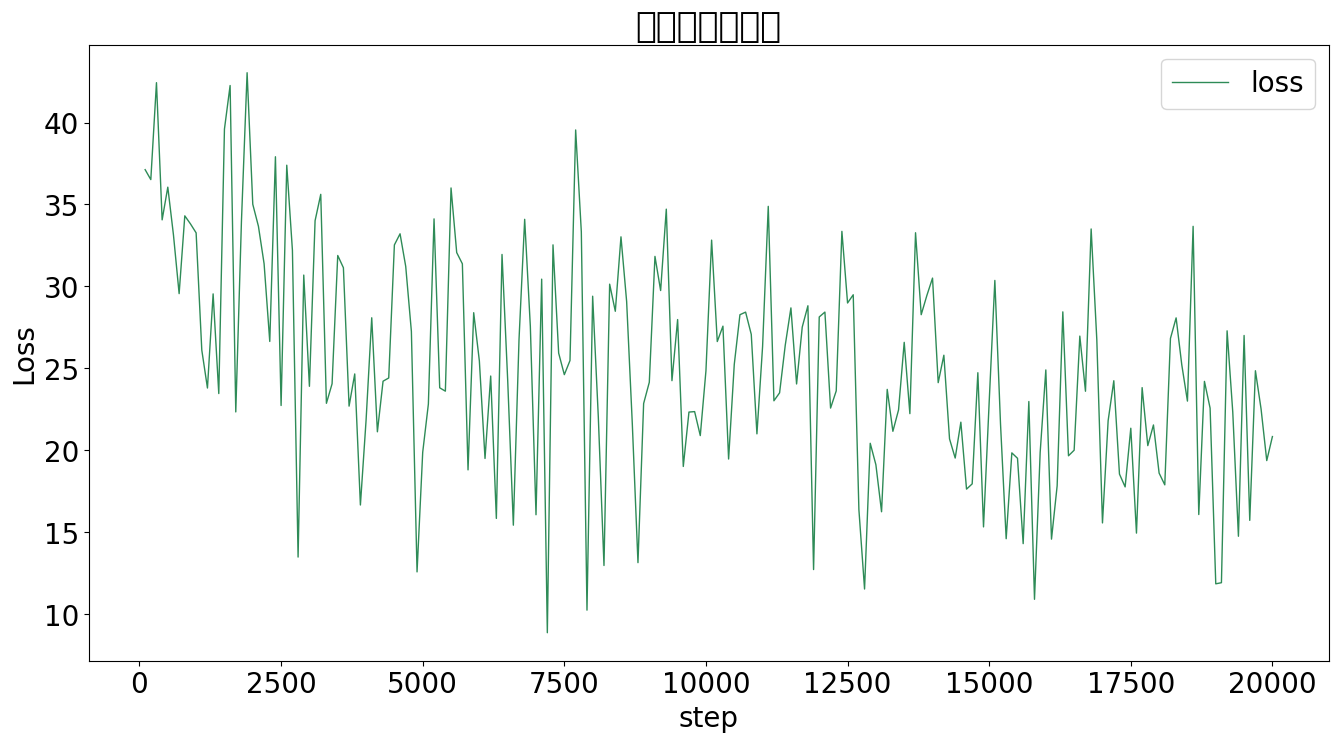

In [63]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

In [64]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_2784/217502035.py:17: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/217502035.py:17: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/217502035.py:17: UserWarning: Glyph 3

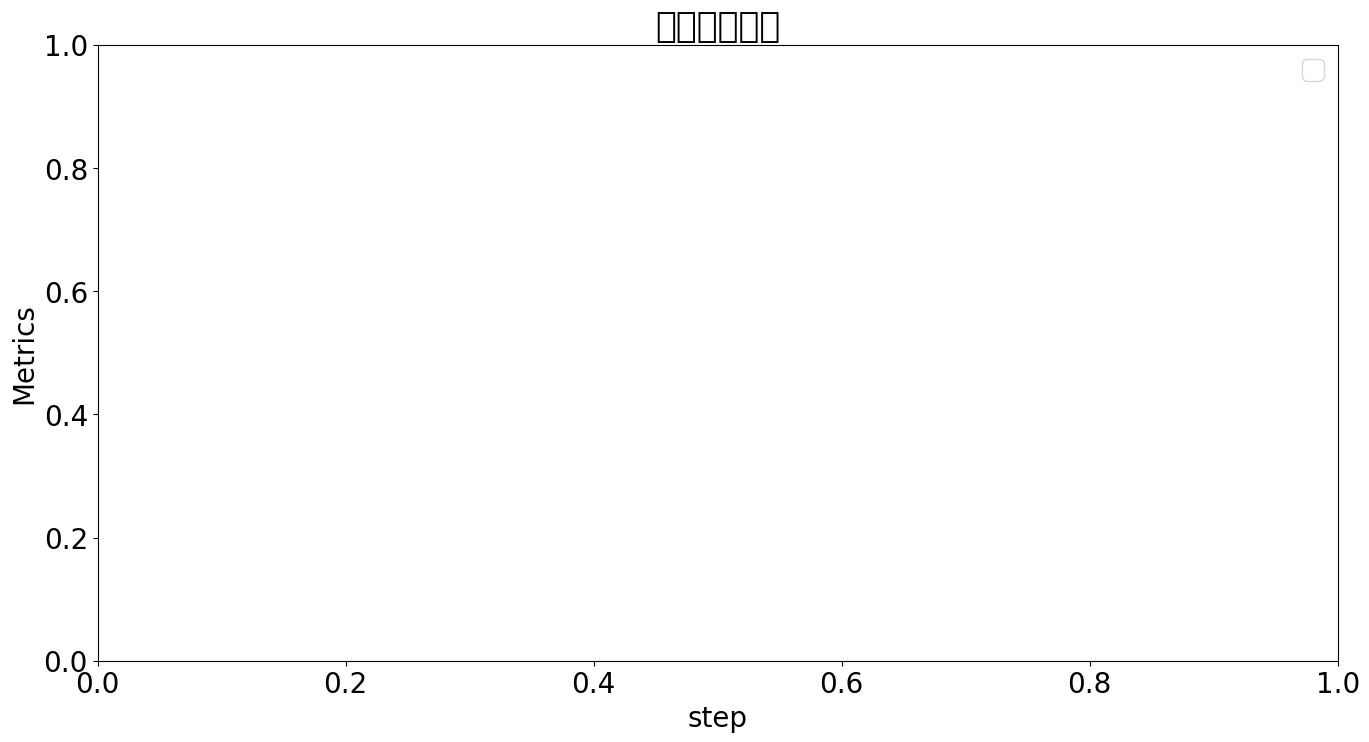

In [66]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [67]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [68]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.


/tmp/ipykernel_2784/1268794451.py:18: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/1268794451.py:18: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/1268794451.py:18: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/1268794451.py:18: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from current font.
  plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/1268794451.py:18: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from current font.
  plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2784/1268794451.py:18: UserWarning: Glyph 25351 (\

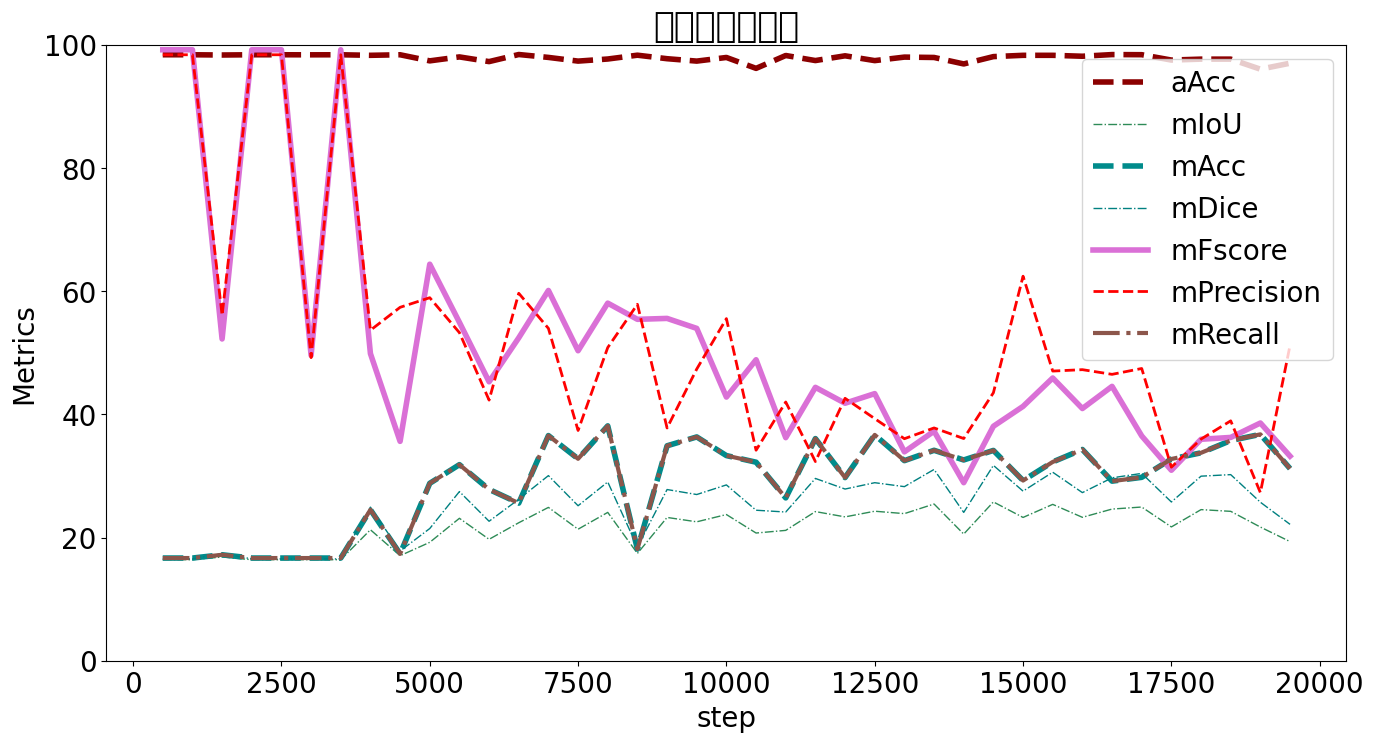

In [69]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.show()